# Read in data and load necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
%matplotlib inline

df2023 = pd.read_csv('./survey_results_public_2023.csv')
df2019 = pd.read_csv('./survey_results_public_2019.csv')

df2023.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [2]:
# To gain an overview of Survey Data 2022
print("There are {0} rows and {1} columns in Stack Overflow Survey Data - 2023".format(df2023.shape[0], df2023.shape[1]))
df2023.describe()

There are 89184 rows and 84 columns in Stack Overflow Survey Data - 2023


,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [3]:
# To gain an overview of Survey Data 2018
print("There are {0} rows and {1} columns in Stack Overflow Survey Data - 2019".format(df2019.shape[0], df2019.shape[1]))
df2019.describe()

There are 88883 rows and 85 columns in Stack Overflow Survey Data - 2019


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


# Question 1: Did work culture around the world changed before and after global pandemic?  

In [4]:
# Remove rows associated with NaN values for Country and RemoteWork/WorkRemote columns
df2023_rw = df2023.dropna(subset=['Country', 'RemoteWork'], axis=0)
df2019_rw = df2019.dropna(subset=['Country', 'WorkRemote'], axis=0)

# Calculate the proportion of individuals in each RemoteWork category of Survey Data 2023
work2023_vals = df2023_rw.RemoteWork.value_counts().sort_index()

In [5]:
# Classify type of work culture into new categorical variable - WorkCulture 
for ind, val in df2019_rw.iterrows():
    # Match each value to its respective category
    if val['WorkRemote'] == "Less than once per month / Never":
        df2019_rw.at[ind, 'WorkCulture'] = "In-person"
    elif val['WorkRemote'] == "All or almost all the time (I'm full-time remote)":
        df2019_rw.at[ind, 'WorkCulture'] = "Remote"
    else:
        df2019_rw.at[ind, 'WorkCulture'] = "Hybrid (some remote, some in-person)"

work2019_vals = df2019_rw.WorkCulture.value_counts().sort_index()

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/2458226193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019_rw.at[ind, 'WorkCulture'] = "In-person"


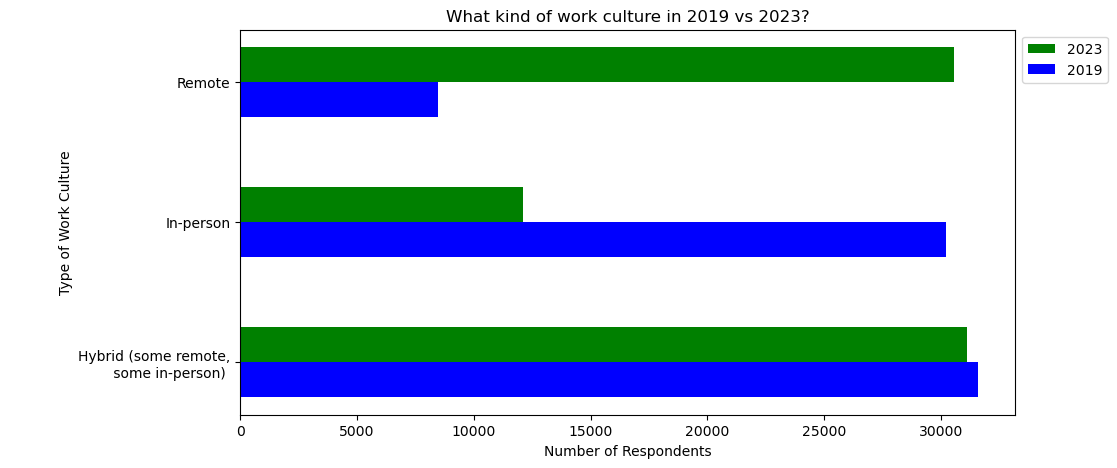

In [6]:
# Survey Data 2019 & 2023 - the bar chart of individuals in each RemoteWork category
fig, ax = plt.subplots(figsize = (10, 5))
index = np.arange(len(work2023_vals.index))
bar_width = 0.25
opacity = 0.8

ax.barh(index, work2023_vals, color='g', align='edge', height=bar_width, label="2023")
ax.barh(index, work2019_vals, color='b', align='edge', height=-bar_width, label='2019')

# assign the tick labels
ax.set_yticks(index)
ax.set_yticklabels(["Hybrid (some remote,\n some in-person) ", "In-person", "Remote"])

plt.ylabel('Type of Work Culture', wrap=True)
plt.xlabel('Number of Respondents')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("What kind of work culture in 2019 vs 2023?")
plt.show()

# Question 2: Which are the countries adopted remote work culture after global pandemic?

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/3998725434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_rw['WorkFromHome'] =  df2023_rw['RemoteWork'].isin (['Remote', 'Hybrid (some remote,some in-person)'])


Text(0.5, 1.0, 'Top 10 Countries with The Highest Proportion of Employees Remote Work from Home')

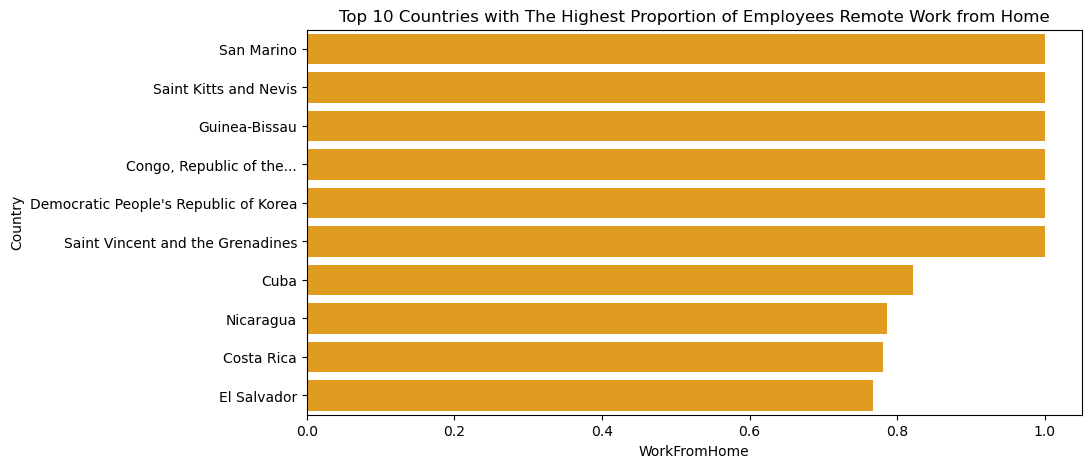

In [7]:
#Create new variable to indicate respondents are working remotely from home
df2023_rw['WorkFromHome'] =  df2023_rw['RemoteWork'].isin (['Remote', 'Hybrid (some remote,some in-person)'])
country_wfh = df2023_rw.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending = False)

plt.figure(figsize=[10,5])
sns.barplot(y=country_wfh.index, x=country_wfh, color='orange', order=country_wfh[:10].index)
plt.title("Top 10 Countries with The Highest Proportion of Employees Remote Work from Home")

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/147443409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_rw['WorkOnsite'] =  df2023_rw['RemoteWork']== 'In-person'


Text(0.5, 1.0, 'Top 10 Countries with The Highest Proportion of Employees Working in Office')

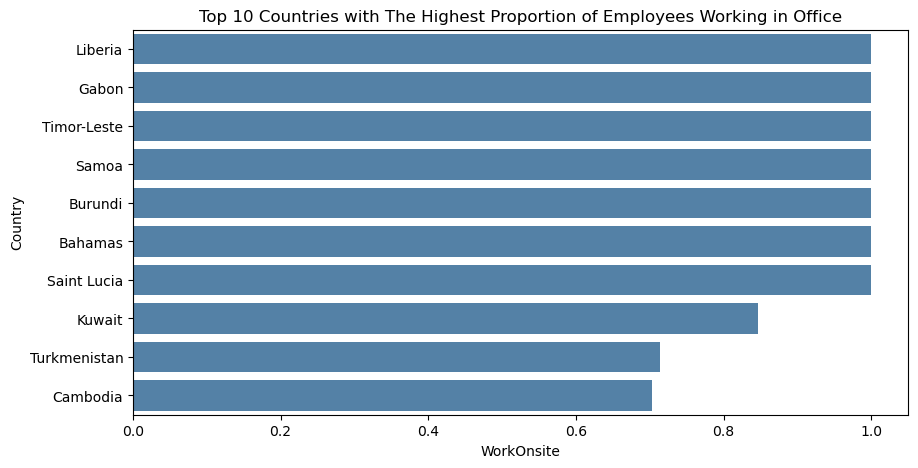

In [8]:
#Create new variable to indicate respondents are working onsite
df2023_rw['WorkOnsite'] =  df2023_rw['RemoteWork']== 'In-person'
country_onsite = df2023_rw.groupby(['Country'])['WorkOnsite'].mean().sort_values(ascending = False)

plt.figure(figsize=[10,5])
sns.barplot(y=country_onsite.index, x=country_onsite, color='steelblue', order=country_onsite[:10].index)
plt.title("Top 10 Countries with The Highest Proportion of Employees Working in Office")

# Question 3: Is the number of developer increase after global pandemic?

Text(0.5, 1.0, 'Comparison of total developers paid in 2019 vs 2023')

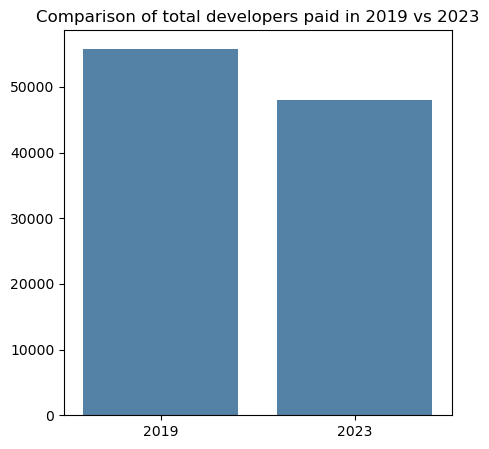

In [9]:
# Compare number of developers paid in 2019 vs 2023
total_dev = [df2019['ConvertedComp'].count(), df2023['ConvertedCompYearly'].count()]

plt.figure(figsize=[5,5])
sns.barplot(y=total_dev, x=['2019', '2023'], color='steelblue')
plt.title("Comparison of total developers paid in 2019 vs 2023")


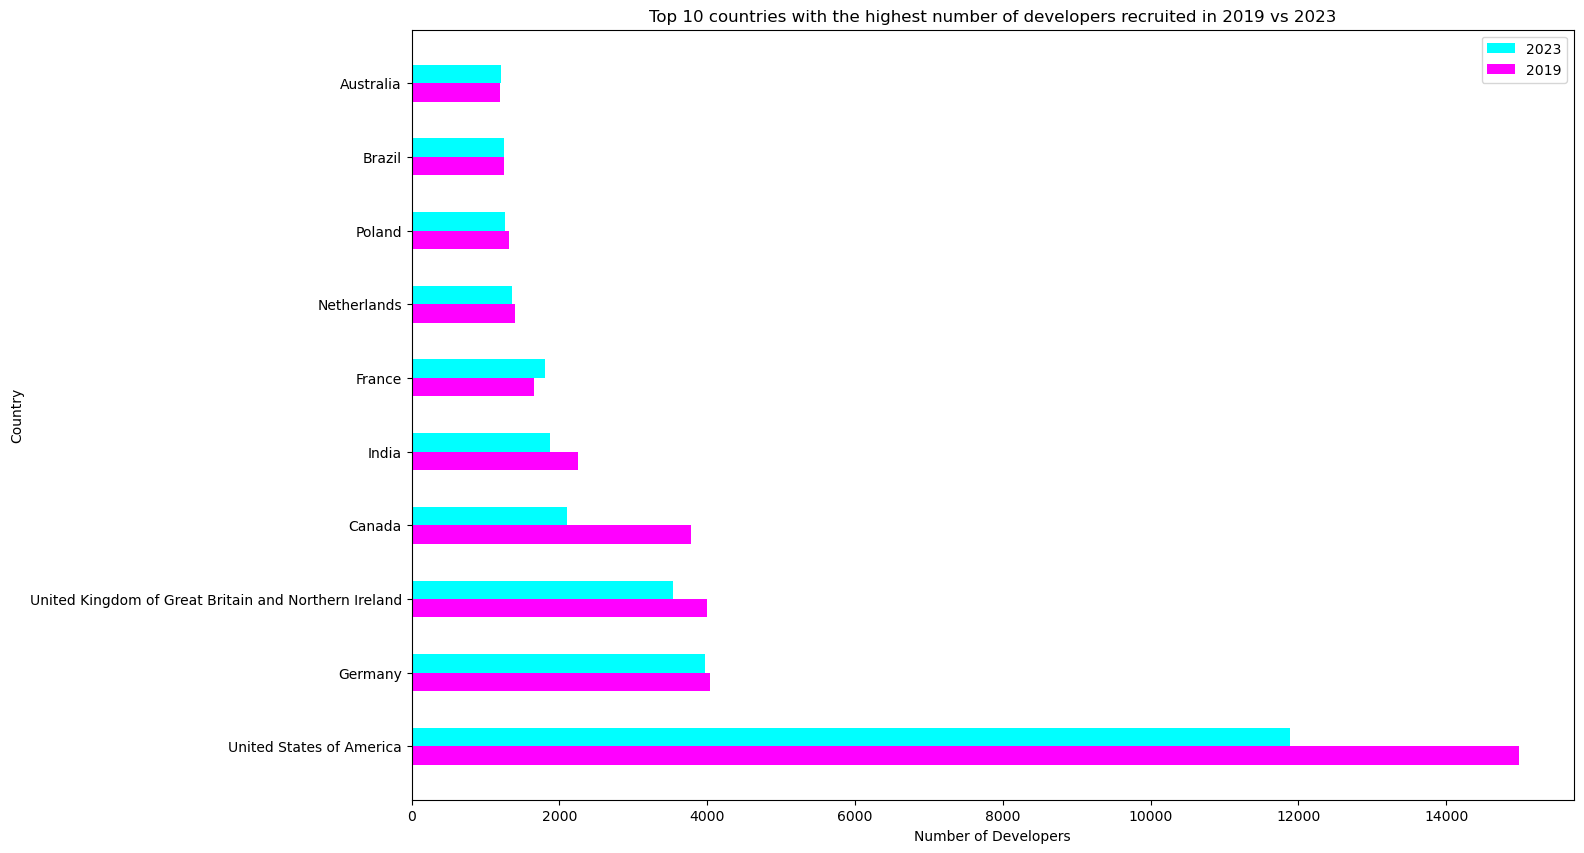

In [10]:
# Compare number of developers paid by each country
dev2023_vals = df2023.groupby(['Country'])['ConvertedCompYearly'].count().sort_values(ascending = False)
dev2019_vals = df2019.groupby(['Country'])['ConvertedComp'].count().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (15, 10))
index = np.arange(len(dev2023_vals[:10].index))
bar_width = 0.25
opacity = 0.8

ax.barh(index, dev2023_vals[:10], color='aqua', align='edge', height=bar_width, label="2023")
ax.barh(index, dev2019_vals[:10], color='magenta', align='edge', height=-bar_width, label='2019')

# assign the tick labels
ax.set_yticks(index)
ax.set_yticklabels(dev2023_vals[:10].index)

plt.xlabel('Number of Developers', wrap=True)
plt.ylabel('Country')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Top 10 countries with the highest number of developers recruited in 2019 vs 2023")
plt.show()

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/1392158625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2023.corr(), annot=True, fmt=".2f")


<Axes: >

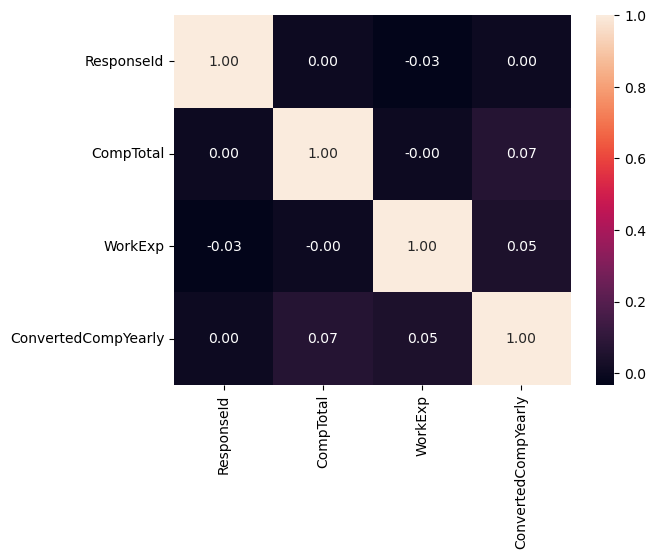

In [11]:
sns.heatmap(df2023.corr(), annot=True, fmt=".2f")

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/3785632564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2019.corr(), annot=True, fmt=".2f");


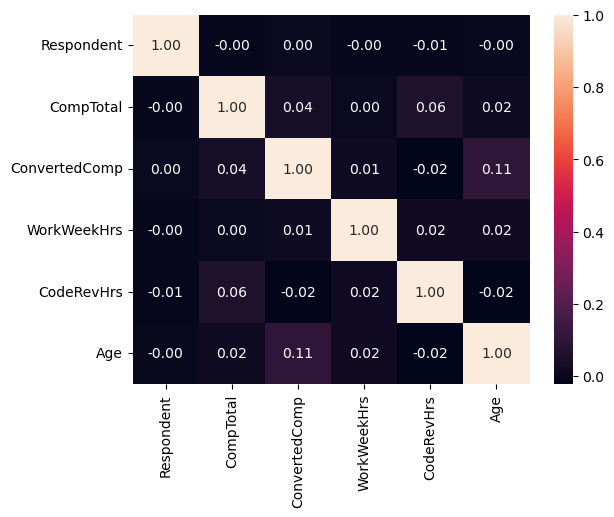

In [12]:
sns.heatmap(df2019.corr(), annot=True, fmt=".2f");

In [13]:
# Classify age into new categorical variable - AgeRange
df2023 = df2023.dropna(subset=['Age', 'ConvertedCompYearly'], axis=0)
df2019 = df2019.dropna(subset=['Age', 'ConvertedComp'], axis=0)

for ind, val in df2019.iterrows():
    # Match each value to its respective category
    if val['Age'] < 18:
        df2019.at[ind, 'AgeRange'] = "Under 18 years old"
    elif val['Age'] >= 18 and val['Age'] < 25:
        df2019.at[ind, 'AgeRange'] = "18-24 years old"
    elif val['Age'] >= 25 and val['Age'] < 35:
        df2019.at[ind, 'AgeRange'] = "25-34 years old"
    elif val['Age'] >= 35 and val['Age'] < 45:
        df2019.at[ind, 'AgeRange'] = "35-44 years old"
    elif val['Age'] >= 45 and val['Age'] < 55:
        df2019.at[ind, 'AgeRange'] = "45-54 years old"
    elif val['Age'] >= 55 and val['Age'] < 65:
        df2019.at[ind, 'AgeRange'] = "55-64 years old"
    elif val['Age'] >= 65:
        df2019.at[ind, 'AgeRange'] = "65 years or older"
    else:
        df2019.at[ind, 'AgeRange'] = "Prefer not to say"
        
age2019_vals = df2019.AgeRange.value_counts().sort_index()

In [14]:
df2023 = df2023[df2023['Age'] != 'Prefer not to say']

In [15]:
age2019_vals = df2019.groupby(['AgeRange']).mean()['ConvertedComp'].sort_values().dropna()
age2023_vals = df2023.groupby(['Age']).mean()['ConvertedCompYearly'].sort_values().dropna()

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/1973048020.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age2019_vals = df2019.groupby(['AgeRange']).mean()['ConvertedComp'].sort_values().dropna()
/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/1973048020.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age2023_vals = df2023.groupby(['Age']).mean()['ConvertedCompYearly'].sort_values().dropna()


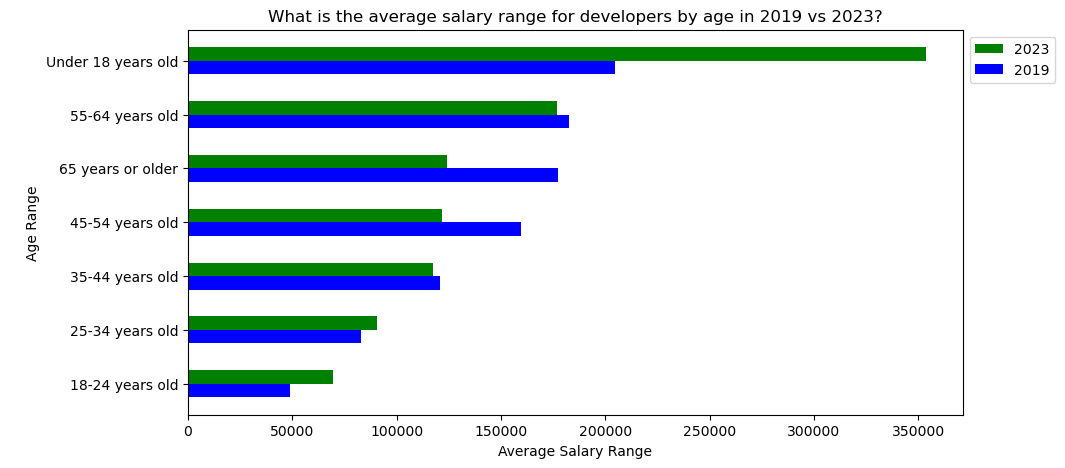

In [16]:
fig, ax = plt.subplots(figsize = (10, 5))
index = np.arange(len(age2023_vals.index))
bar_width = 0.25
opacity = 0.8

ax.barh(index, age2023_vals, color='g', align='edge', height=bar_width, label="2023")
ax.barh(index, age2019_vals, color='b', align='edge', height=-bar_width, label='2019')

# assign the tick labels
ax.set_yticks(index)
ax.set_yticklabels(age2023_vals.index)

plt.ylabel('Age Range', wrap=True)
plt.xlabel('Average Salary Range')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("What is the average salary range for developers by age in 2019 vs 2023?")
plt.show()

In [17]:
# Classify age into new categorical variable - AgeRange
df2023 = df2023.dropna(subset=['YearsCodePro', 'ConvertedCompYearly'], axis=0)
df2019 = df2019.dropna(subset=['YearsCodePro', 'ConvertedComp'], axis=0)

for ind, val in df2019.iterrows():
    # Match each value to its respective category
    if val['YearsCodePro'] in ['1', '2', '3', '4', '5']:
        df2019.at[ind, 'YearsCodeRange'] = "1-5 years"
    elif val['YearsCodePro'] in ['6', '7', '8', '9', '10']:
        df2019.at[ind, 'YearsCodeRange'] = "6-10 years"
    elif val['YearsCodePro'] in ['11', '12', '13', '14', '15']:
        df2019.at[ind, 'YearsCodeRange'] = "11-15 years"
    elif val['YearsCodePro'] in ['16', '17', '18', '19', '20']:
        df2019.at[ind, 'YearsCodeRange'] = "16-20 years"
    elif val['YearsCodePro'] in ['21', '22', '23', '24', '25']:
        df2019.at[ind, 'YearsCodeRange'] = "21-25 years"
    elif val['YearsCodePro'] in ['26', '27', '28', '29', '30']:
        df2019.at[ind, 'YearsCodeRange'] = "26-30 years"
    elif val['YearsCodePro'] in ("Less than 1 year", "More than 60 years"):
        df2019.at[ind, 'YearsCodeRange'] = val['YearsCodePro']
    else:
        df2019.at[ind, 'YearsCodeRange'] = "More than 30 years"

#yearsCode2019_vals = df2019.YearsCodeRange.value_counts().sort_index()
yearscode2019 = df2019.groupby(['YearsCodeRange']).mean()['ConvertedComp'].sort_values().dropna()
print(yearscode2019)

YearsCodeRange
Less than 1 year       87337.284298
1-5 years             103303.087696
6-10 years            132748.803263
11-15 years           151944.946819
16-20 years           179090.783954
21-25 years           182197.220800
More than 30 years    187887.213930
26-30 years           204149.981504
Name: ConvertedComp, dtype: float64


/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/2608829354.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearscode2019 = df2019.groupby(['YearsCodeRange']).mean()['ConvertedComp'].sort_values().dropna()


In [18]:
for ind, val in df2023.iterrows():
    # Match each value to its respective category
    if val['YearsCodePro'] in ['1', '2', '3', '4', '5']:
        df2023.at[ind, 'YearsCodeRange'] = "1-5 years"
    elif val['YearsCodePro'] in ['6', '7', '8', '9', '10']:
        df2023.at[ind, 'YearsCodeRange'] = "6-10 years"
    elif val['YearsCodePro'] in ['11', '12', '13', '14', '15']:
        df2023.at[ind, 'YearsCodeRange'] = "11-15 years"
    elif val['YearsCodePro'] in ['16', '17', '18', '19', '20']:
        df2023.at[ind, 'YearsCodeRange'] = "16-20 years"
    elif val['YearsCodePro'] in ['21', '22', '23', '24', '25']:
        df2023.at[ind, 'YearsCodeRange'] = "21-25 years"
    elif val['YearsCodePro'] in ['26', '27', '28', '29', '30']:
        df2023.at[ind, 'YearsCodeRange'] = "26-30 years"
    elif val['YearsCodePro'] in ("Less than 1 year", "More than 60 years"):
        df2023.at[ind, 'YearsCodeRange'] = val['YearsCodePro']
    else:
        df2023.at[ind, 'YearsCodeRange'] = "More than 30 years"
        
yearscode2023 = df2023.groupby(['YearsCodeRange']).mean()['ConvertedCompYearly'].sort_values().dropna()
print(yearscode2023)

YearsCodeRange
1-5 years              68562.920545
6-10 years            102565.188387
Less than 1 year      103498.050903
11-15 years           114892.596659
16-20 years           123719.825846
26-30 years           131612.279777
21-25 years           151787.987387
More than 30 years    187624.279139
Name: ConvertedCompYearly, dtype: float64


/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_2214/125348516.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearscode2023 = df2023.groupby(['YearsCodeRange']).mean()['ConvertedCompYearly'].sort_values().dropna()


Index(['1-5 years', '6-10 years', 'Less than 1 year', '11-15 years',
       '16-20 years', '26-30 years', '21-25 years', 'More than 30 years'],
      dtype='object', name='YearsCodeRange')


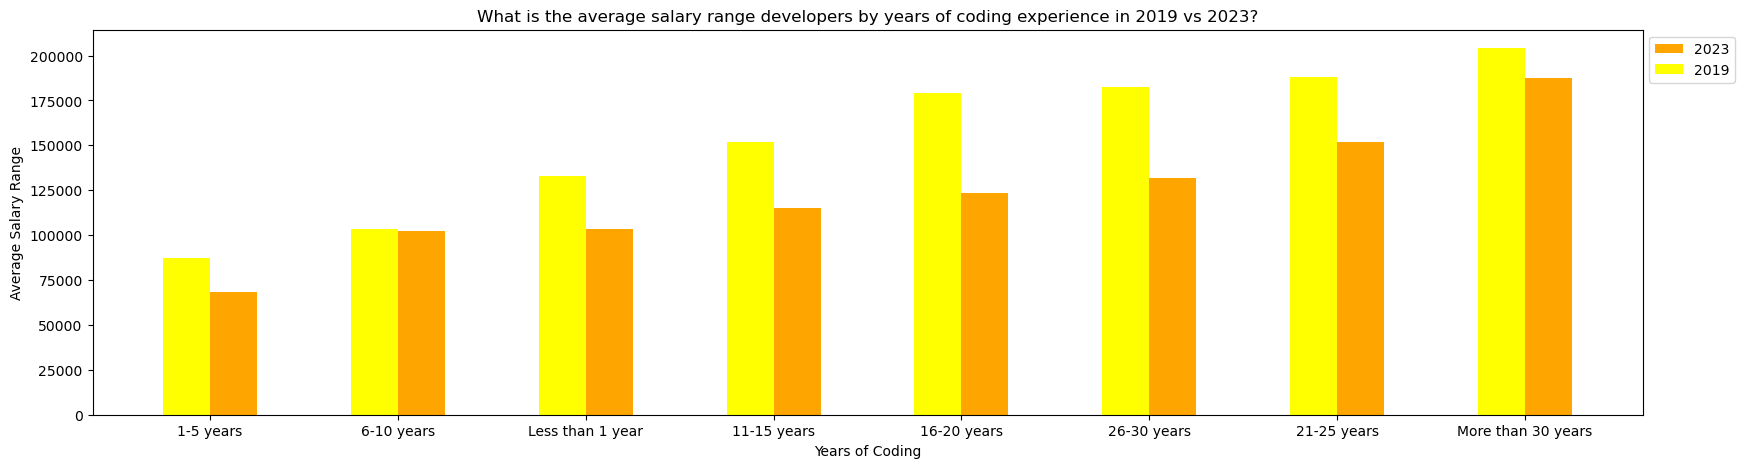

In [19]:
fig, ax = plt.subplots(figsize = (20, 5))
index = np.arange(len(yearscode2023.index))
print(yearscode2023.index)
bar_width = 0.25
opacity = 0.8

ax.bar(index, yearscode2023, color='orange', align='edge', width=bar_width, label="2023")
ax.bar(index, yearscode2019, color='yellow', align='edge', width=-bar_width, label='2019')

# assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(yearscode2023.index)

plt.ylabel('Average Salary Range', wrap=True)
plt.xlabel('Years of Coding')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("What is the average salary range developers by years of coding experience in 2019 vs 2023?")
plt.show()